In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import datetime as dt
%pylab inline
from sklearn import linear_model

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('athlete_events.csv', dtype=unicode)
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [15]:
sport = df[['Name','NOC','Sport','Games']].drop_duplicates()
sport[['Name','Sport']].drop_duplicates()['Sport'].value_counts()


Athletics                    22053
Swimming                      8761
Rowing                        7684
Football                      6161
Cycling                       5819
Boxing                        5254
Wrestling                     4987
Shooting                      4879
Sailing                       4480
Gymnastics                    4132
Fencing                       4118
Ice Hockey                    3882
Hockey                        3813
Basketball                    3412
Canoeing                      3204
Weightlifting                 2880
Alpine Skiing                 2734
Judo                          2721
Handball                      2699
Water Polo                    2599
Volleyball                    2502
Cross Country Skiing          2400
Equestrianism                 2345
Art Competitions              1814
Bobsleigh                     1694
Speed Skating                 1582
Figure Skating                1572
Diving                        1466
Tennis              

In [14]:
mlr = df
# mlr.Medal.map(dict(Gold=1,Silver=1,Bronze=1))
def medal (column):
    if column =='Gold':
        return 1
    elif column =='Silver':
        return 1
    elif column =='Bronze':
        return 1
    else:
        return 0

mlr['Medal Winner']=mlr['Medal'].apply(medal)
mlr

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal Winner
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0
5,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,0
6,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,0
7,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,0
8,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,0
9,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,0


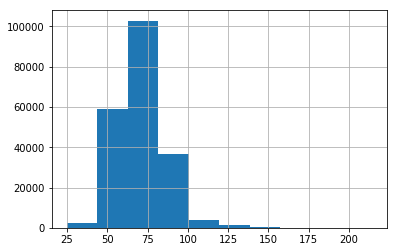

In [106]:
df['Weight'].hist()

In [107]:
athlete=df[['Name','Age','Height','Weight','Games','Event']].drop_duplicates().dropna()
athlete['Age'].mean()
athlete['Height'].mean()
athlete['Weight'].mean()

70.68836435428399

In [97]:
athlete_s=df[['Name','Age','Height','Season','Weight','Games','Event']].drop_duplicates().dropna()
mask1=athlete_s['Season'] == 'Summer'
mask2=athlete_s['Season'] == 'Winter'
athlete_summer=athlete_s[mask1]
athlete_summer['Age'].mean()
athlete_summer['Height'].mean()
athlete_summer['Weight'].mean()

70.67249178124925

In [102]:
athlete_winter=athlete_s[mask2]
athlete_winter['Age'].mean()
athlete_winter['Height'].mean()
athlete_winter['Weight'].mean()

70.75541701512962

In [57]:
medal_winner=df[['Name','Age','Height','Weight','Games','Event','Medal']].drop_duplicates().dropna()
medal_winner.groupby(['Medal'])['Age','Height','Weight'].mean()

,Age,Height,Weight
Medal,,,
Bronze,25.493890,177.353666,73.491821
Gold,25.330678,177.997246,74.134110
Silver,25.463612,177.573586,73.630600


In [109]:
country_hac=df[['Sex','Age','NOC','Height','Weight','Games','Event','Medal']].drop_duplicates().dropna()
country_hac=country_hac.groupby(['Medal','Sex'])['Age','Height','Weight'].mean()
country_hac=country_hac.reset_index()

In [77]:
season_hac=df[['Sex','Age','NOC','Height','Weight','Games','Season','Event','Medal']].drop_duplicates().dropna()
season_hac=season_hac.groupby(['Medal','Season'])['Age','Height','Weight'].mean()
season_hac

Age      Height     Weight
Medal  Season                                  
Bronze Summer  25.399977  177.738490  73.697768
       Winter  26.015833  175.243192  72.356238
Gold   Summer  25.202720  178.379060  74.299390
       Winter  26.024074  175.919136  73.188889
Silver Summer  25.357873  177.949623  73.806036
       Winter  26.008600  175.643735  72.709767

In [3]:
age_height = df
age_height.dropna(subset = ['Age','Height','Weight'],inplace=True)
age_height['Age'] =age_height['Age'].astype(float)
age_height['Height'] = age_height['Height'].astype(float)
age_height['Weight'] =age_height['Weight'].astype(float)
age_height['Year'] = age_height['Year'].astype(int)
age_height.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
def periodSplit(y):
    if (y < 1926):
        period = '1early'
    elif (y < 1956):
        period = '2mid_early'
    elif ( y < 1986):
        period = '3early_modern'
    else:
        period = '4modern'
        
    return period

age_height['Period'] = age_height['Year'].map(periodSplit)

age_height.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Period
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,4modern
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,4modern
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,4modern
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,4modern
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,4modern


In [5]:
country_period =age_height.groupby(['NOC','Period'])['Age','Height','Weight'].mean()

country_period.head()

Age      Height     Weight
NOC Period                                         
AFG 3early_modern  23.837838  169.216216  66.837838
    4modern        22.764706  173.588235  64.529412
AHO 3early_modern  25.481481  174.407407  72.888889
    4modern        27.916667  180.541667  79.875000
ALB 4modern        25.175439  173.000000  71.192982

In [6]:
country_stats = country_period.unstack()
country_stats=country_stats.dropna()
country_stats=country_stats.reset_index()
country_stats.head()

NOC        Age                                          Height  \
Period          1early 2mid_early 3early_modern    4modern      1early   
0       ARG  23.571429  25.504762     26.063750  26.293846  183.428571   
1       AUS  29.296296  23.462687     23.909662  25.667565  173.888889   
2       AUT  24.461538  25.512195     25.111111  26.838336  178.692308   
3       BEL  28.160000  29.362069     24.307018  26.025375  177.480000   
4       BRA  25.000000  23.212121     23.942899  25.981346  181.000000   

                                                 Weight             \
Period  2mid_early 3early_modern     4modern     1early 2mid_early   
0       173.304762    175.738750  177.573077  78.000000  71.333333   
1       179.641791    176.169082  177.197082  67.851852  72.746269   
2       172.268293    176.117745  178.372828  83.692308  68.756098   
3       176.637931    175.535088  176.641292  77.040000  73.034483   
4       178.606061    179.598829  177.165856  70.000000  71.909091   

                                 
Period 3early_modern    4modern  
0          73.401250  74.503846  
1          71.208696  72.893603  
2          73.236318  73.934702  
3          70.609023  69.348328  
4          74.775988  71.934307

In [7]:
# df['Year'] = pd.to_datetime(df['Year'])

df['Year']=df['Year'].astype(int)

In [8]:
teams = df['Team']  # Select one column from our DataFrame; this is a Series
mask = ((df['Year'] >= 1896) & (df['Year'] <= 1926))
mask2 = ((df['Year'] >= 1927) & (df['Year'] <= 1957))
mask3 = ((df['Year'] >= 1958) & (df['Year'] <= 1988))
mask4 = ((df['Year'] >= 1989) & (df['Year'] <= 2016))
early=df[mask]
early1 = df[mask]
early2 = df[mask]
mid_early=df[mask2]
mid_early1 =df[mask2]
mid_early2 = df[mask2]
early_modern = df[mask3]
early_modern1 = df[mask3]
early_modern2 = df[mask3]
modern = df[mask4]
modern1 = df[mask4]
modern2 = df[mask4]

early


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Period
130,47,Erling Rudolf Aastad,M,22.0,177.0,74.0,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Athletics,Athletics Men's 4 x 100 metres Relay,NaN,1early
131,47,Erling Rudolf Aastad,M,22.0,177.0,74.0,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Athletics,Athletics Men's Long Jump,NaN,1early
132,47,Erling Rudolf Aastad,M,26.0,177.0,74.0,Norway,NOR,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's Long Jump,NaN,1early
672,391,Clarence John Abel,M,23.0,185.0,102.0,United States,USA,1924 Winter,1924,Winter,Chamonix,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver,1early
727,416,Nils Georg berg,M,19.0,181.0,78.0,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Long Jump,Bronze,1early
728,416,Nils Georg berg,M,19.0,181.0,78.0,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Triple Jump,Silver,1early
875,505,"Alexander ""Alex"" Abraham (Steglitz)",M,25.0,186.0,84.0,Germany,GER,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Decathlon,NaN,1early
911,519,Harold Maurice Abrahams,M,20.0,183.0,75.0,Great Britain,GBR,1920 Summer,1920,Summer,Antwerpen,Athletics,Athletics Men's 100 metres,NaN,1early
912,519,Harold Maurice Abrahams,M,20.0,183.0,75.0,Great Britain,GBR,1920 Summer,1920,Summer,Antwerpen,Athletics,Athletics Men's 200 metres,NaN,1early
913,519,Harold Maurice Abrahams,M,20.0,183.0,75.0,Great Britain,GBR,1920 Summer,1920,Summer,Antwerpen,Athletics,Athletics Men's 4 x 100 metres Relay,NaN,1early


In [9]:
count1 = early['NOC'].value_counts()
df1 = pd.DataFrame(columns=['Medals(1896-1926)'])
df1['Medals(1896-1926)']= early['NOC'].value_counts()
df1.reset_index(level=0, inplace=True)
df1.columns=['NOC','Medals(1896-1926)']
df1.head()


,NOC,Medals(1896-1926)
0,USA,773
1,SWE,272
2,FIN,254
3,GBR,203
4,FRA,181


In [10]:
count2 = mid_early['NOC'].value_counts()
df2 = pd.DataFrame(columns=['Medals(1927-1957)'])
df2['Medals(1927-1957)']= mid_early['NOC'].value_counts()
df2.reset_index(level=0, inplace=True)
df2.columns=['NOC','Medals(1927-1957)']
df2.head()

,NOC,Medals(1927-1957)
0,USA,1223
1,FIN,858
2,POL,639
3,FRA,438
4,GER,397


In [11]:
count3 = early_modern['NOC'].value_counts()
df3 = pd.DataFrame(columns=['Medals(1958-1988)'])
df3['Medals(1958-1988)']= early_modern['NOC'].value_counts()
df3.reset_index(level=0, inplace=True)
df3.columns=['NOC','Medals(1958-1988)']
df3.head()

,NOC,Medals(1958-1988)
0,USA,5018
1,URS,4539
2,GBR,3489
3,FRG,3270
4,JPN,3130


In [12]:
count4 = modern['NOC'].value_counts()
df4 = pd.DataFrame(columns=['Medals(1989-2016)'])
df4['Medals(1989-2016)']= modern['NOC'].value_counts()
df4.reset_index(level=0, inplace=True)
df4.columns=['NOC','Medals(1989-2016)']
df4.head()

,NOC,Medals(1989-2016)
0,USA,7200
1,GER,5663
2,RUS,4793
3,CAN,4571
4,FRA,4481


In [13]:
olympic_periods = df1.merge(df2,
                                   left_on='NOC',
                                   right_on='NOC',
                                  )
olympic_periods = olympic_periods.merge(df3,
                                   left_on='NOC',
                                   right_on='NOC',
                                   )
olympic_periods = olympic_periods.merge(df4,
                                   left_on='NOC',
                                   right_on='NOC',
                                   )
olympic_periods['Medals(1896-1926)']=(olympic_periods['Medals(1896-1926)']/(olympic_periods['Medals(1896-1926)'].sum()))
olympic_periods['Medals(1927-1957)']=(olympic_periods['Medals(1927-1957)']/(olympic_periods['Medals(1927-1957)'].sum()))
olympic_periods['Medals(1958-1988)']=(olympic_periods['Medals(1958-1988)']/(olympic_periods['Medals(1958-1988)'].sum()))
olympic_periods['Medals(1989-2016)']=(olympic_periods['Medals(1989-2016)']/(olympic_periods['Medals(1989-2016)'].sum()))
olympic_periods

,NOC,Medals(1896-1926),Medals(1927-1957),Medals(1958-1988),Medals(1989-2016)
0,USA,0.337407,0.178644,0.095670,0.103563
1,SWE,0.118725,0.041484,0.045585,0.034046
2,FIN,0.110869,0.125329,0.032926,0.022295
3,GBR,0.088608,0.057552,0.066519,0.052932
4,FRA,0.079005,0.063979,0.054851,0.064453
5,GER,0.061545,0.057990,0.020991,0.081455
6,NOR,0.030554,0.014607,0.023260,0.024035
7,POL,0.025753,0.093339,0.049627,0.034909
8,CAN,0.024880,0.031113,0.059560,0.065748
9,HUN,0.019206,0.034181,0.045242,0.029199


In [14]:
mask = olympic_periods['Medals(1927-1957)']/olympic_periods['Medals(1896-1926)'] >1.49
early=olympic_periods[['NOC','Medals(1896-1926)','Medals(1927-1957)']]
mask1 = early['Medals(1927-1957)']>=.01
early_risers=early[mask]
early_risers = early_risers[mask1]
early_risers['Percent Increase'] = (early_risers['Medals(1927-1957)']/early_risers['Medals(1896-1926)']) *100
early_risers.sort_values(by=['Percent Increase'],ascending=False)


C:\Users\ckraw\Anaconda2\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,NOC,Medals(1896-1926),Medals(1927-1957),Percent Increase
31,BUL,0.000436,0.012708,2911.437336
28,LUX,0.000873,0.020742,2376.000584
26,YUG,0.001309,0.014607,1115.493232
19,JPN,0.003492,0.037978,1087.605901
20,ARG,0.003055,0.017821,583.243604
21,SUI,0.002619,0.014023,535.436751
15,TCH,0.006984,0.028338,405.760663
7,POL,0.025753,0.093339,362.440767
11,ITA,0.013968,0.035933,257.260627
12,AUS,0.011785,0.028192,239.211326


In [15]:
mask2 = olympic_periods['Medals(1927-1957)']/olympic_periods['Medals(1896-1926)'] <.51
early1=olympic_periods[['NOC','Medals(1896-1926)','Medals(1927-1957)']]
mask3 = early1['Medals(1896-1926)'] >=.01
early_fallers=early1[mask2]
early_fallers = early_fallers[mask3]
early_fallers['Percent Decrease'] = (early_fallers['Medals(1896-1926)']/early_fallers['Medals(1927-1957)']) *100
early_fallers.sort_values(by=['Percent Decrease'],ascending=False)

C:\Users\ckraw\Anaconda2\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,NOC,Medals(1896-1926),Medals(1927-1957),Percent Decrease
1,SWE,0.118725,0.041484,286.195216
10,GRE,0.013968,0.005551,251.639137
6,NOR,0.030554,0.014607,209.175033


In [16]:
mask4 = olympic_periods['Medals(1958-1988)']/olympic_periods['Medals(1927-1957)'] >1.49
mid=olympic_periods[['NOC','Medals(1927-1957)','Medals(1958-1988)']]
mask5 = mid['Medals(1958-1988)']>=.01
mid_risers=mid[mask4]
mid_risers = mid_risers[mask5]
mid_risers['Percent Increase'] = (mid_risers['Medals(1958-1988)']/mid_risers['Medals(1927-1957)']) *100
mid_risers.sort_values(by=['Percent Increase'],ascending=False)

C:\Users\ckraw\Anaconda2\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,NOC,Medals(1927-1957),Medals(1958-1988),Percent Increase
18,ESP,0.003067,0.028713,936.027912
32,CUB,0.004382,0.019123,436.377953
17,NED,0.008618,0.027035,313.694816
25,NZL,0.004382,0.012526,285.842787
31,BUL,0.012708,0.033193,261.193666
21,SUI,0.014023,0.036567,260.771720
16,AUT,0.010809,0.026215,242.523653
27,DEN,0.006135,0.014833,241.776134
30,BRA,0.007304,0.017121,234.417189
26,YUG,0.014607,0.029037,198.784732


In [17]:
mask6 = olympic_periods['Medals(1958-1988)']/olympic_periods['Medals(1927-1957)'] <.51
mid1=olympic_periods[['NOC','Medals(1927-1957)','Medals(1958-1988)']]
mask7 = mid1['Medals(1927-1957)']>=.01
mid_fallers=mid1[mask6]
mid_fallers = mid_fallers[mask7]
mid_fallers['Percent Decrease'] = (mid_fallers['Medals(1927-1957)']/mid_fallers['Medals(1958-1988)']) *100
mid_fallers.sort_values(by=['Percent Decrease'],ascending=False)

C:\Users\ckraw\Anaconda2\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,NOC,Medals(1927-1957),Medals(1958-1988),Percent Decrease
28,LUX,0.020742,0.003527,588.076052
2,FIN,0.125329,0.032926,380.637724
5,GER,0.057990,0.020991,276.261309


In [18]:
mask8 = olympic_periods['Medals(1989-2016)']/olympic_periods['Medals(1958-1988)'] >1.49
modern=olympic_periods[['NOC','Medals(1958-1988)','Medals(1989-2016)']]
mask9 = modern['Medals(1989-2016)']>=.01
modern_risers=modern[mask8]
modern_risers = modern_risers[mask9]
modern_risers['Percent Increase'] = (modern_risers['Medals(1989-2016)']/modern_risers['Medals(1958-1988)']) *100
modern_risers.sort_values(by=['Percent Increase'],ascending=False)

C:\Users\ckraw\Anaconda2\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,NOC,Medals(1958-1988),Medals(1989-2016),Percent Increase
14,RSA,0.001335,0.013334,999.095407
5,GER,0.020991,0.081455,388.047162
10,GRE,0.008198,0.019490,237.736633
30,BRA,0.017121,0.032133,187.686096


In [19]:
mask10 = olympic_periods['Medals(1989-2016)']/olympic_periods['Medals(1958-1988)'] <.51
modern1=olympic_periods[['NOC','Medals(1958-1988)','Medals(1989-2016)']]
mask11 = modern1['Medals(1958-1988)']>=.01
modern_fallers=modern1[mask10]
modern_fallers = modern_fallers[mask11]
modern_fallers['Percent Decrease'] = (modern_fallers['Medals(1958-1988)']/modern_fallers['Medals(1989-2016)']) *100
modern_fallers.sort_values(by=['Percent Decrease'],ascending=False)

C:\Users\ckraw\Anaconda2\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,NOC,Medals(1958-1988),Medals(1989-2016),Percent Decrease
26,YUG,0.029037,0.000259,11215.073645
15,TCH,0.041048,0.005034,815.362469


In [20]:
mask12 = olympic_periods['Medals(1989-2016)']/olympic_periods['Medals(1896-1926)'] >1.49
allTime=olympic_periods[['NOC','Medals(1896-1926)','Medals(1989-2016)']]
mask13 = allTime['Medals(1989-2016)']>=.01
allTime_risers=allTime[mask12]
allTime_risers = allTime_risers[mask13]
allTime_risers['Percent Increase'] = (allTime_risers['Medals(1989-2016)']/allTime_risers['Medals(1896-1926)']) *100
allTime_risers.sort_values(by=['Percent Increase'],ascending=False)

C:\Users\ckraw\Anaconda2\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,NOC,Medals(1896-1926),Medals(1989-2016),Percent Increase
31,BUL,0.000436,0.017145,3928.012312
32,CUB,0.000436,0.016915,3875.287315
30,BRA,0.000873,0.032133,3680.863887
19,JPN,0.003492,0.058815,1684.316521
27,DEN,0.000873,0.012686,1453.232743
25,NZL,0.001309,0.017980,1373.046809
21,SUI,0.002619,0.030335,1158.302288
18,ESP,0.004365,0.040318,923.676050
17,NED,0.004801,0.032234,671.344996
20,ARG,0.003055,0.016642,544.668054


In [21]:
mask14 = olympic_periods['Medals(1989-2016)']/olympic_periods['Medals(1896-1926)'] <.51
allTime1=olympic_periods[['NOC','Medals(1896-1926)','Medals(1989-2016)']]
mask15 = allTime1['Medals(1896-1926)']>=.01
allTime_fallers=allTime1[mask14]
allTime_fallers = allTime_fallers[mask15]
allTime_fallers['Percent Decrease'] = (allTime_fallers['Medals(1896-1926)']/allTime_fallers['Medals(1989-2016)']) *100
allTime_fallers.sort_values(by=['Percent Decrease'],ascending=False)

C:\Users\ckraw\Anaconda2\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,NOC,Medals(1896-1926),Medals(1989-2016),Percent Decrease
2,FIN,0.110869,0.022295,497.285085
1,SWE,0.118725,0.034046,348.717756
0,USA,0.337407,0.103563,325.799499


In [31]:
early_cnt = early2[['NOC','Name','Games']].drop_duplicates()['NOC'].value_counts()
mid_cnt = mid_early2[['NOC','Name','Games']].drop_duplicates()['NOC'].value_counts()
early_modern_cnt = early_modern2[['NOC','Name','Games']].drop_duplicates()['NOC'].value_counts()
modern_cnt = modern2[['NOC','Name','Games']].drop_duplicates()['NOC'].value_counts()

In [32]:
early_cmp= pd.DataFrame(early_cnt)
early_cmp['Mid Count']= mid_cnt
early_cmp['change'] = ((early_cmp['Mid Count']/early_cmp['Mid Count'].sum())-(early_cmp['NOC']/early_cmp['NOC'].sum()))*100
early_cmp.reset_index(level=0, inplace=True)
early_cmp.columns=['NOC','Early Count','Mid Count','Athlete # Percent Change']
mask16 = early_cmp['NOC'].isin(early_fallers['NOC'])
mask17 = early_cmp['NOC'].isin(early_risers['NOC'])
early_cmp[mask16]

,NOC,Early Count,Mid Count,Athlete # Percent Change
2,SWE,128,195.0,-5.211225
6,NOR,46,75.0,-1.764468
15,GRE,13,23.0,-0.458946


In [44]:
mid_cmp= pd.DataFrame(mid_cnt)
mid_cmp['Mid Count']= early_modern_cnt
mid_cmp['change'] = ((mid_cmp['Mid Count']/mid_cmp['Mid Count'].sum())-(mid_cmp['NOC']/mid_cmp['NOC'].sum()))*100
mid_cmp.reset_index(level=0, inplace=True)
mid_cmp.columns=['NOC','Mid Count','Early Modern Count','Athlete # Percent Change']
mask18 = mid_cmp['NOC'].isin(mid_fallers['NOC'])
mask19 = mid_cmp['NOC'].isin(mid_risers['NOC'])
mid_cmp[mask19]

,NOC,Mid Count,Early Modern Count,Athlete # Percent Change
8,ITA,183,2002.0,0.683048
10,JPN,140,1940.0,1.394338
11,CAN,132,2005.0,1.690040
12,AUS,118,1494.0,0.873950
14,YUG,81,1101.0,0.760984
16,NOR,75,802.0,0.240466
18,SUI,61,1147.0,1.251561
20,AUT,52,962.0,1.033241
23,BUL,37,1034.0,1.481221
24,BRA,35,687.0,0.779766


In [45]:
modern_cmp= pd.DataFrame(early_modern_cnt)
modern_cmp['Mid Count']= modern_cnt
modern_cmp['change'] = ((modern_cmp['Mid Count']/modern_cmp['Mid Count'].sum())-(modern_cmp['NOC']/modern_cmp['NOC'].sum()))*100
modern_cmp.reset_index(level=0, inplace=True)
modern_cmp.columns=['NOC','Early Modern Count','Modern Count','Athlete # Percent Change']
mask20 = modern_cmp['NOC'].isin(modern_fallers['NOC'])
mask21 = modern_cmp['NOC'].isin(modern_risers['NOC'])
modern_cmp[mask21]

,NOC,Early Modern Count,Modern Count,Athlete # Percent Change
25,GER,760,3950.0,4.291800
26,BRA,687,1795.0,1.322876
33,GRE,356,1115.0,0.951660
85,RSA,53,737.0,0.963870


In [46]:
all_cmp= pd.DataFrame(modern_cnt)
all_cmp['Early Count']= early_cnt
all_cmp['change'] = ((all_cmp['Early Count']/all_cmp['Early Count'].sum())-(all_cmp['NOC']/all_cmp['NOC'].sum()))*100
all_cmp.reset_index(level=0, inplace=True)
all_cmp.columns=['NOC','Modern Count','Early Count','Athlete # Percent Change']
mask122 = all_cmp['NOC'].isin(allTime_fallers['NOC'])
mask23 = all_cmp['NOC'].isin(allTime_risers['NOC'])
all_cmp[mask23]

,NOC,Modern Count,Early Count,Athlete # Percent Change
3,AUS,3161,16.0,-2.552563
4,CAN,3150,42.0,-0.599226
5,ITA,3039,19.0,-2.184081
8,JPN,2756,5.0,-2.893430
10,ESP,2143,6.0,-2.092241
11,BRA,1795,1.0,-2.052907
14,NED,1655,5.0,-1.588463
17,SUI,1412,6.0,-1.225819
18,HUN,1410,22.0,-0.029419
20,AUT,1132,6.0,-0.893948


In [23]:
early4 = pd.DataFrame(index=df['NOC'].drop_duplicates(),columns=['rank'])
early4.columns=['n']

mid4 = pd.DataFrame(index=df['NOC'].drop_duplicates(),columns=['rank'])
mid4.columns=['n']

modern4 = pd.DataFrame(index=df['NOC'].drop_duplicates(),columns=['rank'])
modern4.columns=['n']

allTime4 = pd.DataFrame(index=df['NOC'].drop_duplicates(),columns=['rank'])
allTime4.columns=['n']

In [24]:


country_stats['Age']['1early'] = (country_stats['Age']['1early'])/(country_stats['Age']['1early'].mean())
country_stats['Age']['2mid_early'] = (country_stats['Age']['2mid_early'])/(country_stats['Age']['2mid_early'].mean())
country_stats['Age']['3early_modern'] = (country_stats['Age']['3early_modern'])/(country_stats['Age']['3early_modern'].mean())
country_stats['Age']['4modern'] = (country_stats['Age']['4modern'])/(country_stats['Age']['4modern'].mean())

country_stats['Height']['1early'] = (country_stats['Height']['1early'])/(country_stats['Height']['1early'].mean())
country_stats['Height']['2mid_early'] = (country_stats['Height']['2mid_early'])/(country_stats['Height']['2mid_early'].mean())
country_stats['Height']['3early_modern'] = (country_stats['Height']['3early_modern'])/(country_stats['Height']['3early_modern'].mean())
country_stats['Height']['4modern'] = (country_stats['Height']['4modern'])/(country_stats['Height']['4modern'].mean())

country_stats['Weight']['1early'] = (country_stats['Weight']['1early'])/(country_stats['Weight']['1early'].mean())
country_stats['Weight']['2mid_early'] = (country_stats['Weight']['2mid_early'])/(country_stats['Weight']['2mid_early'].mean())
country_stats['Weight']['3early_modern'] = (country_stats['Weight']['3early_modern'])/(country_stats['Weight']['3early_modern'].mean())
country_stats['Weight']['4modern'] = (country_stats['Weight']['4modern'])/(country_stats['Weight']['4modern'].mean())

country_stats

C:\Users\ckraw\Anaconda2\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ckraw\Anaconda2\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ckraw\Anaconda2\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

NOC        Age                                          Height  \
Period          1early 2mid_early 3early_modern    4modern      1early   
0       ARG  23.571429  25.504762     26.063750  26.293846  183.428571   
1       AUS  29.296296  23.462687     23.909662  25.667565  173.888889   
2       AUT  24.461538  25.512195     25.111111  26.838336  178.692308   
3       BEL  28.160000  29.362069     24.307018  26.025375  177.480000   
4       BRA  25.000000  23.212121     23.942899  25.981346  181.000000   
5       BUL  25.000000  19.684211     23.884486  24.346952  172.000000   
6       CAN  23.947368  22.826667     23.232186  25.724144  174.526316   
7       CHI  25.500000  23.326087     25.386861  26.164634  169.500000   
8       CUB  29.000000  25.038462     22.699106  25.622449  155.000000   
9       DEN  23.000000  27.115385     25.850904  26.649209  171.000000   
10      ESP  23.300000  32.533333     23.853434  25.722204  176.200000   
11      FIN  26.952756  26.407194     25.769593  26.138841  176.248031   
12      FRA  24.574586  25.329231     24.543155  25.823293  173.651934   
13      GBR  27.428571  24.735849     24.501309  26.094295  175.955665   
14      GER  23.510638  24.912727     24.472608  26.367826  176.432624   
15      GRE  23.625000  25.000000     24.739011  25.122635  182.468750   
16      HAI  20.500000  25.800000     23.954545  26.475000  171.000000   
17      HUN  21.636364  25.944785     24.374470  24.888133  179.590909   
18      ITA  22.906250  25.416107     24.303807  26.183632  175.781250   
19      JPN  24.375000  23.563758     23.919941  24.807684  166.875000   
20      LUX  20.500000  23.725806     27.502646  26.528846  180.500000   
21      NED  22.181818  25.859649     23.347211  26.265854  173.636364   
22      NOR  23.371429  27.666667     24.699812  26.492149  175.957143   
23      NZL  21.333333  23.722222     24.774775  26.643695  165.333333   
24      POL  26.694915  26.338174     24.666931  25.606311  173.661017   
25      RSA  27.750000  24.944444     25.662791  24.949299  176.200000   
26      SUI  23.500000  26.885057     25.483112  26.426829  178.333333   
27      SWE  24.683824  26.251185     24.921830  26.678375  178.669118   
28      TCH  22.000000  24.252033     24.411186  23.989114  176.312500   
29      TUR  16.000000  24.250000     25.555556  24.763200  173.000000   
30      URU  22.000000  23.086957     22.977778  25.519685  174.833333   
31      USA  24.046572  24.301837     23.740781  26.076458  178.697283   
32      YUG  24.666667  24.518072     24.157974  23.761702  190.000000   

                                                 Weight             \
Period  2mid_early 3early_modern     4modern     1early 2mid_early   
0       173.304762    175.738750  177.573077  78.000000  71.333333   
1       179.641791    176.169082  177.197082  67.851852  72.746269   
2       172.268293    176.117745  178.372828  83.692308  68.756098   
3       176.637931    175.535088  176.641292  77.040000  73.034483   
4       178.606061    179.598829  177.165856  70.000000  71.909091   
5       166.210526    172.355944  173.514401  66.000000  62.552632   
6       175.166667    174.790633  175.016920  73.649123  67.610000   
7       178.565217    173.043796  174.990854  67.000000  71.369565   
8       172.230769    173.596822  176.115646  43.000000  73.115385   
9       174.807692    178.844880  180.511858  65.000000  69.230769   
10      172.400000    174.618928  174.979173  72.400000  75.466667   
11      173.893525    175.822039  176.388411  73.452756  68.428058   
12      176.000000    174.186271  175.921285  71.745856  72.932308   
13      172.958491    174.678665  176.647808  72.886700  66.320755   
14      174.734545    174.442355  178.152393  71.879433  69.981818   
15      177.218750    176.557692  176.733006  87.187500  70.718750   
16      169.600000    171.090909  176.500000  63.500000  61.200000   
17      177.312883    173.888366  177.463632  72.659091  73.177914   
18      174.75838

In [25]:
early4=early4.reset_index()
mid4=mid4.reset_index()
modern4=modern4.reset_index()
allTime4=allTime4.reset_index()
early4['Early_Age_faller']=country_stats['Age']['1early'] - country_stats['Age']['2mid_early']
early4['Early_Age_riser']=country_stats['Age']['2mid_early'] - country_stats['Age']['1early']

early4['Early_Height_faller']=country_stats['Height']['1early'] - country_stats['Height']['2mid_early']
early4['Early_Height_riser']=country_stats['Height']['2mid_early'] - country_stats['Height']['1early']

early4['Early_Weight_faller']=country_stats['Weight']['1early'] - country_stats['Weight']['2mid_early']
early4['Early_Weight_riser']=country_stats['Weight']['2mid_early'] - country_stats['Weight']['1early']

mid4['Mid_Early_Age_faller']=country_stats['Age']['2mid_early'] - country_stats['Age']['3early_modern']
mid4['Mid_Early_Age_riser']=country_stats['Age']['3early_modern'] - country_stats['Age']['2mid_early']

mid4['Mid_Early_Height_faller']=country_stats['Height']['2mid_early'] - country_stats['Height']['3early_modern']
mid4['Mid_Early_Height_riser']=country_stats['Height']['3early_modern'] - country_stats['Height']['2mid_early']

mid4['Mid_Early_Weight_faller']=country_stats['Weight']['2mid_early'] - country_stats['Weight']['3early_modern']
mid4['Mid_Early_Weight_riser']=country_stats['Weight']['3early_modern'] - country_stats['Weight']['2mid_early']

modern4['Early_Modern_Age_faller']=country_stats['Age']['3early_modern'] - country_stats['Age']['4modern']
modern4['Early_Modern_Age_riser']=country_stats['Age']['4modern'] - country_stats['Age']['3early_modern']

modern4['Early_Modern_Height_faller']=country_stats['Height']['3early_modern'] - country_stats['Height']['4modern']
modern4['Early_Modern_Height_riser']=country_stats['Height']['4modern'] - country_stats['Height']['3early_modern']

modern4['Early_Modern_Weight_faller']=country_stats['Weight']['3early_modern'] - country_stats['Weight']['4modern']
modern4['Early_Modern_Weight_riser']=country_stats['Weight']['4modern'] - country_stats['Weight']['3early_modern']
allTime4['AllTime_Age_faller']=country_stats['Age']['1early'] - country_stats['Age']['4modern']
allTime4['AllTime_Age_riser']=country_stats['Age']['4modern'] - country_stats['Age']['1early']

allTime4['AllTime_Height_faller']=country_stats['Height']['1early'] - country_stats['Height']['4modern']
allTime4['AllTime_Height_riser']=country_stats['Height']['4modern'] - country_stats['Height']['1early']

allTime4['AllTime_Weight_faller']=country_stats['Weight']['1early'] - country_stats['Weight']['4modern']
allTime4['AllTime_Weight_riser']=country_stats['Weight']['4modern'] - country_stats['Weight']['1early']


In [27]:

mask18 = early4['NOC'].isin(early_fallers['NOC'])
mask19 = early4['NOC'].isin(early_risers['NOC'])
early4[mask19]

,NOC,n,Early_Age_faller,Early_Age_riser,Early_Height_faller,Early_Height_riser,Early_Weight_faller,Early_Weight_riser
10,BUL,NaN,-9.233333,9.233333,3.800000,-3.800000,-3.066667,3.066667
11,ITA,NaN,0.545562,-0.545562,2.354506,-2.354506,5.024698,-5.024698
14,ARG,NaN,-1.402089,1.402089,1.698079,-1.698079,1.897614,-1.897614
22,HUN,NaN,-4.295238,4.295238,-2.940293,2.940293,-3.867399,3.867399
35,AUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,SUI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,POL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,TCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,AUT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
mask20 = mid4['NOC'].isin(mid_fallers['NOC'])
mask21 = mid4['NOC'].isin(mid_risers['NOC'])
mid4[mask21]

,NOC,n,Mid_Early_Age_faller,Mid_Early_Age_riser,Mid_Early_Height_faller,Mid_Early_Height_riser,Mid_Early_Weight_faller,Mid_Early_Weight_riser
1,NED,NaN,-0.446975,0.446975,3.472709,-3.472709,1.537573,-1.537573
4,NOR,NaN,-0.730778,0.730778,-0.992768,0.992768,-2.866897,2.866897
8,ESP,NaN,2.339355,-2.339355,-1.366053,1.366053,2.231571,-2.231571
10,BUL,NaN,8.679899,-8.679899,-2.218928,2.218928,4.920603,-4.920603
11,ITA,NaN,0.637601,-0.637601,-1.928514,1.928514,-3.097576,3.097576
15,CUB,NaN,0.260989,-0.260989,0.661058,-0.661058,-5.187843,5.187843
33,CAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,AUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,BRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
mask22 = modern4['NOC'].isin(modern_fallers['NOC'])
mask23 = modern4['NOC'].isin(modern_risers['NOC'])
mid4[mask23]

,NOC,n,Mid_Early_Age_faller,Mid_Early_Age_riser,Mid_Early_Height_faller,Mid_Early_Height_riser,Mid_Early_Weight_faller,Mid_Early_Weight_riser
17,GRE,NaN,1.570315,-1.570315,3.424518,-3.424518,3.645413,-3.645413
36,RSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,BRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
mask24 = allTime4['NOC'].isin(allTime_fallers['NOC'])
mask25 = allTime4['NOC'].isin(allTime_risers['NOC'])
allTime4[mask24]

,NOC,n,AllTime_Age_faller,AllTime_Age_riser,AllTime_Height_faller,AllTime_Height_riser,AllTime_Weight_faller,AllTime_Weight_riser
2,USA,NaN,-2.376798,2.376798,0.319480,-0.319480,9.757605,-9.757605
3,FIN,NaN,2.134625,-2.134625,0.838708,-0.838708,7.691672,-7.691672
65,SWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
